In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct  4 15:31:28 2020
@author: Diego Villafani
Simulación de un Laser. Potencia y Espectro Optico.
"""

#En este programa podremos simular el Laser sintonizable que observamos en el Laboratorio.
#EL MODELO ES MUY SIMPLE Y NO ESTA DESTINADO A DETALLAR EL FUNCIONAMIENTO REAL DE UN LASER, SOLO COMO EJEMPLO.


In [2]:
#Primero Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt


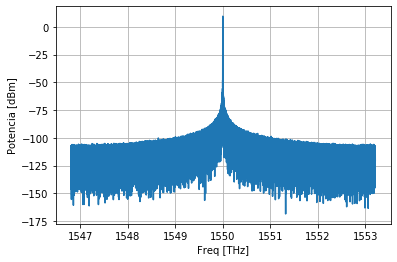

In [8]:
#El Laser simulado estara en el espectro electromagnetico al rededor de 1550nm
Longitud_de_onda_del_laser_central=1550e-9 #Longitud de Onda en metros e-9 =nm



###################### Aqui El alumno puede cambiar la Potencia del Laser  #################################
Potencia_dBm= 0 #Potencia en dBm

###################### Aqui El alumno puede cambiar la frequencia del laser respecto a 1550nm  #############
Sintonizar_Laser=0e9  #Sintonizar Laser respecto a 1550nm

#Creando Los parametros para la simulacion 

Potencia_mw=10**(Potencia_dBm/10)   #Potencia en mW

c  = 2.99792458e8                   #Velocidad de la luz

Frequencia_del_laser=c/Longitud_de_onda_del_laser_central    #Frequencia del Laser en Hz

frequencia_de_muestreo=16*50e9 #Span del OSA o rango de frequencias donde veremos la señal
numero_de_muestras=2**20

dt_samp=1/frequencia_de_muestreo #Delta del tiempo entre muestras

Tiempo_total=dt_samp*numero_de_muestras #Tiempo Total

Vector_tiempo=np.arange(0,(numero_de_muestras)*dt_samp,dt_samp) #Vector del Tiempo

Vector_frequencia=Frequencia_del_laser+(1/Tiempo_total)*np.arange(-numero_de_muestras/2,numero_de_muestras/2,1) #Vector de la frequencia

Vector_Longitud_de_onda=c/Vector_frequencia

#Creando el laser simulado

Laser_CW=Potencia_mw*np.ones(numero_de_muestras) #Potencia del laser en el tiempo CW= constant Wave

#Phase noise
varianza_de_fase = 2*np.pi*(100e3)*dt_samp 
fase_con_ruido=np.cumsum(np.sqrt(varianza_de_fase)*np.random.randn(numero_de_muestras))

#Laser Simulado en el tiempo
Laser=Laser_CW*np.exp(1j*2*np.pi*Sintonizar_Laser*Vector_tiempo+1j*fase_con_ruido)

#Convirtiendo la señal del tiempo a frequencia con FFT

Espectro=(np.abs(np.sqrt(dt_samp/numero_de_muestras)*np.fft.fft(Laser))**2)*(1/Tiempo_total)
Espectro_fft=np.append(Espectro[int(numero_de_muestras/2):numero_de_muestras],Espectro[0:int(numero_de_muestras/2)])


#Graficando
plt.grid(True)
#plt.plot(Vector_frequencia/1e12,10*np.log10(Espectro_fft))
plt.plot(Vector_Longitud_de_onda*1e9,10*np.log10(Espectro_fft))
plt.ylabel('Potencia [dBm]')
plt.xlabel('Freq [THz]')
plt.savefig('plot.png', dpi=300)
plt.show()




